In [9]:
from aegomoku.constants_15x15 import *
from aegomoku.utils import analyse_board, analyse_example

import tensorflow as tf
import numpy as np

BOARD_SIZE = 15

In [10]:
stones = [H8, I7, J6, H6, G5, G7, H7, J7, I5, H9, H5, G8, F5, J5]

TypeError: unsupported operand type(s) for +: 'int' and 'str'

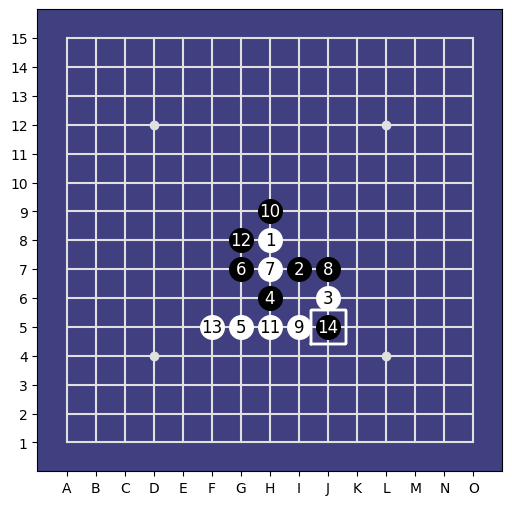

In [11]:
analyse_board(BOARD_SIZE, stones, policy=None)

In [13]:
new_model = tf.keras.models.load_model("models/1_c1.model/")

In [14]:
board = GomokuBoard(BOARD_SIZE, stones)

Next to play: BLACK
Value from BLACK's point of view: 0.9962709546089172


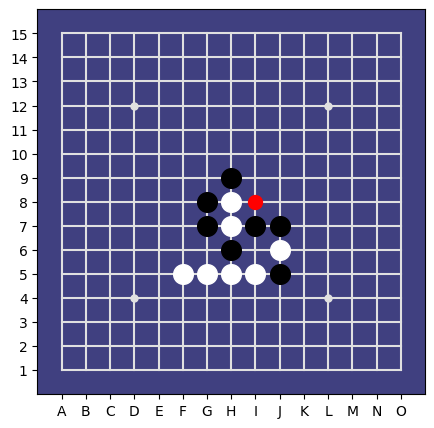

In [15]:
s = np.expand_dims(board.canonical_representation(), 0)
p, v = new_model(s)
p_learned, v_learned = new_model(s)
learned = (s, list(p_learned.numpy()), np.squeeze(v_learned))
analyse_example(BOARD_SIZE, learned, disp_width=5)

In [ ]:
an